In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

data_fn = 'datacum.txt'

Load and prepare data

In [2]:
# read dataset from file
df = pd.read_csv(data_fn, header=None, delimiter=',', comment='#', dtype=int)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,2.689557,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413
std,6.170957e+05,0.951273,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078
min,6.163400e+04,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,8.706885e+05,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,1.171710e+06,2.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.238298e+06,4.000000,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,1.345435e+07,4.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [3]:
# remove null values
df = df[df[7] != 0]
df

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,2,5,1,1,1,2,1,3,1,1
1,1002945,2,5,4,4,5,7,10,3,2,1
2,1015425,2,3,1,1,1,2,2,3,1,1
3,1016277,2,6,8,8,1,3,4,3,7,1
4,1017023,2,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,2,3,1,1,1,3,2,1,1,1
695,841769,2,2,1,1,1,2,1,1,1,1
696,888820,4,5,10,10,3,7,3,8,10,2
697,897471,4,4,8,6,4,3,4,10,6,1


Split data into training set and test set

In [4]:
# select 80 benign samples (class=2) and 40 malignant samples (class=4) for test set
df1 = pd.concat([df[df[1] == 2].sample(80, random_state=17), \
                       df[df[1] == 4].sample(40, random_state=17)])
test_data = df1.iloc[:,2:]
test_labels = df1.iloc[:,1]

# use remaining data for training
df2 = df[~df.index.isin(df1.index)]
train_data = df2.iloc[:,2:]
train_labels = df2.iloc[:,1]

Fit and test model

In [5]:
# fit model
clf = GaussianNB(priors=None)
clf.fit(train_data, train_labels)

GaussianNB()

In [12]:
train_data.shape

(563, 9)

In [6]:
# make predictions using test set
y_pred = clf.predict(test_data)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 4, 4, 4, 4, 4])

Evaluate model

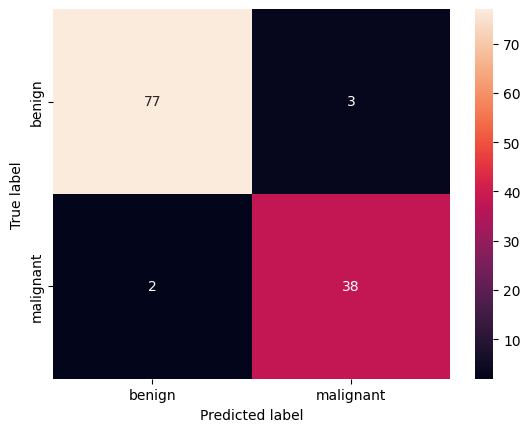

In [7]:
# compute confusion matrix and visualize
cm = confusion_matrix(test_labels, y_pred)
labels = ['benign', 'malignant']
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [14]:
test_labels.shape
y_pred.shape

(120,)

In [8]:
# compute accuracy, precision and recall score
# accuracy = true prediction / total prediction
accuracy1 = (cm[0][0] + cm[1][1]) / len(y_pred)
# precision = TP / (TP + FP) = TP / predicted positive
precision1 = cm[0][0] / (cm[0][0] + cm[1][0])
# recall = TP / (TP + FN) = TP / real positive
recall1 = cm[0][0] / sum(cm[0])

print('Accuracy score:', accuracy1)
print('Precision score:', precision1)
print('Recall score:', recall1)

Accuracy score: 0.9583333333333334
Precision score: 0.9746835443037974
Recall score: 0.9625


In [9]:
# using built-in methods in scikit metrics library
accuracy2 = accuracy_score(test_labels, y_pred)
precision2 = precision_score(test_labels, y_pred, pos_label=2)
recall2 = recall_score(test_labels, y_pred, pos_label=2)

print('Accuracy score:', accuracy2)
print('Precision score:', precision2)
print('Recall score:', recall2)

Accuracy score: 0.9583333333333334
Precision score: 0.9746835443037974
Recall score: 0.9625
